# Regerssion  

در این مبحث میخواهیم رگرسیون که یکی از مهم ترین و پایه ای ترین الگوریتم های ماشین لرنینگ که حتی هنوز هم پر استفاده هست در بعضی از تسک ها را معرفی کنیم 

تصور کنید ما یک سری دیتا پوینت ۲ بعدی داریم که میخواهیم معادله ی خطی بدست آوریم که بهترین دقت و پیش بینی برای داده های واقعی را دارد 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!git clone https://github.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2.git

در گام اول یک سری دیتا پوینت برای این کار خودمان میسازیم  به این صورت که چندین نقطه حول یک معادله مشخص با یک نویز درست میکنیم
و سعی میکنیم با رگرسیون خطی بهترین معادله  را اصطلاحا به دیتا فیت کنیم 

In [2]:
def generate_data(n=100, noise=10):
    np.random.seed(27)
    X = np.linspace(-10, 10, n)
    true_slope = 5
    true_intercept = 3
    # y=5x+3 + noise
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

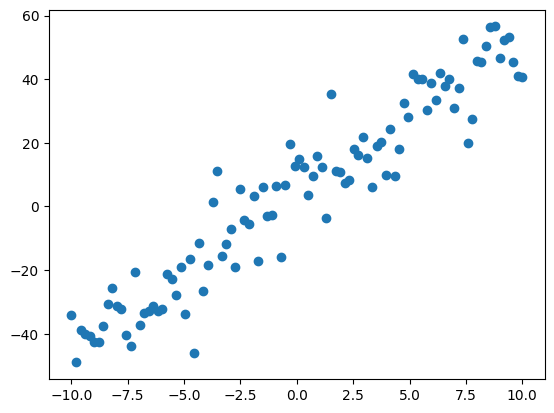

In [3]:
X, y = generate_data(n=100, noise=10.0)
plt.scatter(X, y)
plt.show()

ما دو روش برای حل مسئله رگرسیون خطی داریم 

<div dir="rtl">

۱-اصطلاحا به روش Analytical Solution یعنی به یه فرم بسته از جواب برسیم ( مثل فرمول ها که ما داده ها رو به فرمول میدهیم و جواب میگیریم)‌ 
این روش یک سری مزایا و معایب دارد 
از معایب این روش میتوان به این اشاره کرد که همزمان باید تمام دیتا را با هم استفاده کنیم که همین میتواند باعث نیازمندی به رم فراوان و سخت افزار گران قیمت تر بشود و نکته دیگری که هست ممکن هست دیتا های ما هر ثانیه زیاد تر شوند و اینگونه عملا این روش شاید گزینه خوبی نباشد 
اما از خوبی هایی وجود Analytical Solution میتوان به این اشاره کرد که حتما به جواب خواهیم رسید و با داشتن این گونه راه حل میتوان ایده هایی کسب کرد 

</div>

![LinearRegression1.png](https://raw.githubusercontent.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/refs/heads/master/Images/LinearRegression1.png)

In [ ]:
def h_w(x, w):
    return w[0] + w[1] * x 



def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 4.86, w_0 = 4.00


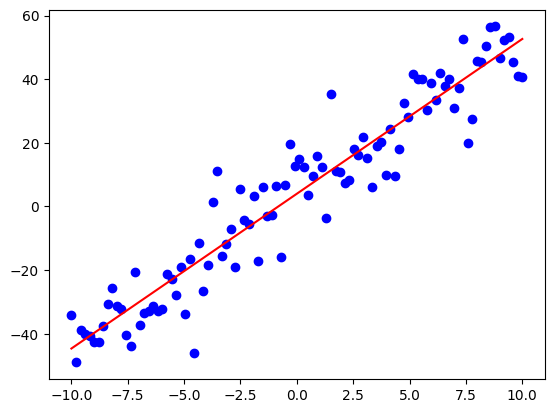

In [13]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()

<div dir="rtl">
۲-این روش مانند خیلی از الگوریتم های دیگر ماشین لرنینگ از cost function کمک میگیرید تا بتواند پارامتر های مدل را بهینه کند 
ما cost function های متنوعی داریم اما در حل این مسئله از SSE به معنای Sum of squered error بهره میبریم زیرا فضای خطای ما را اصطلاحا Convex میکند و باعث میشود که به بهترین جواب برسیم 
</div>

![LinearRegression2.png](https://raw.githubusercontent.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/refs/heads/master/Images/LinearRegression2.png)

In [6]:
def cost_function(X, y, w):
    return np.sum((h_w(X, w) - y)**2) / len(X)

<div dir="rtl">
برای بهینه کردن جواب با استفاده از Cost Function میتوان از روش معروف Gradient Decent استفاده کرد که این روش در زمان خود جان تازه ای به ماشین لرنینگ افزود 
در این روش ما پارامتر های مدل را در گام اول random initialize  میکنیم و سپس با استفاده از تابع loss میزان عملکرد مدل را اندازه میگیریم  و  پارامتر های جدید را بر حسب فرمول زیر بدست میاوریم 
</div>

In [ ]:
def gradient_descent(X, y, w, alpha, num_iters):
    m = len(X)
    cost_history = []
    w_history = [w.copy()]

    for i in range(num_iters):
        # updates
        gradient_w0 = np.sum(h_w(X, w) - y) / m
        gradient_w1 = np.sum((h_w(X, w) - y) * X) / m
        w[0] -= alpha * gradient_w0
        w[1] -= alpha * gradient_w1

        cost_history.append(cost_function(X, y, w))
        w_history.append(w.copy())  

    return w, cost_history, w_history

In [ ]:
X, y = generate_data(n=100, noise=10.0)
w_initial = [0, 0.1]  #  w0 = 0, w1 = 0.1
eta = 0.05  # Learning rate constant
num_iters = 500


w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)


w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = [w0_vals[i], w1_vals[j]]
        J_vals[i, j] = cost_function(X, y, w)

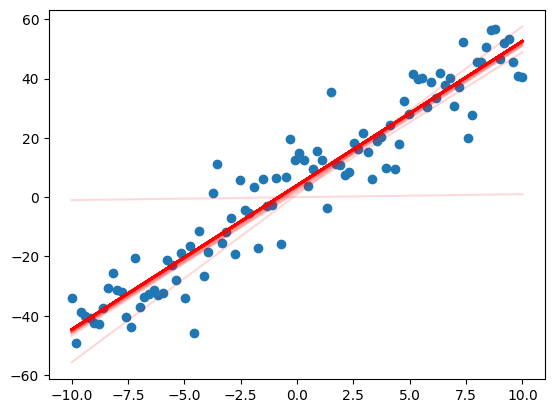

In [ ]:
plt.scatter(X, y)


for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100 
    plt.plot(X, h_w(X, w), color='red', alpha=alpha)


plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')


plt.show()